## Fake data feature requests / MWE

In this notebook we outline two main features we'd like to use in springtime.
To this end, we first make some fake sample data.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
# We have random observations for 10 points:
obs = gpd.GeoDataFrame(
    data = {
        'year': np.arange(2000, 2010), 
        'DOY_firstbloom': np.random.randint(120, 180, size=10),
        'geometry': gpd.GeoSeries.from_xy(*np.random.randn(2, 10))
        },
)
obs

,year,DOY_firstbloom,geometry
0,2000,129,POINT (-0.47519 0.04296)
1,2001,136,POINT (-1.48409 -0.50742)
2,2002,153,POINT (0.94426 -0.21199)
3,2003,135,POINT (0.29152 -1.54929)
4,2004,153,POINT (1.04712 0.28730)
5,2005,167,POINT (-0.84866 -0.80568)
6,2006,168,POINT (-1.10011 0.54719)
7,2007,179,POINT (-0.52378 0.05342)
8,2008,128,POINT (-0.78217 0.39899)
9,2009,175,POINT (-1.15685 -0.01451)


In [3]:
# For each of these years/locations, we can retrieve temperature records for each DOY
get_temperature = lambda year, geometry: pd.Series(np.random.randn(365), index=np.arange(1, 366), name='temperature')
get_temperature(obs.geometry[0], 2000)


1     -0.258835
2     -0.542725
3      0.544299
4      0.934947
5     -0.515771
         ...   
361   -0.008609
362    0.358386
363   -0.700696
364   -0.749247
365   -0.039406
Name: temperature, Length: 365, dtype: float64

### Combining observations and weather data

In [4]:
# We can transpose the data and combine it with the "observations"
weather = obs.apply(lambda row: get_temperature(row.year, row.geometry), axis=1)
weather

,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
0,0.307213,-1.730910,1.142865,-1.329763,0.176960,-0.065294,0.480736,-0.871330,0.000798,0.656874,...,-1.513503,-0.264486,1.128968,1.585038,0.769073,0.223731,-0.271954,0.934556,-0.371321,0.527513
1,0.981330,-0.629055,0.147775,0.177528,-0.658201,-0.508874,0.010616,0.054272,0.078030,1.134169,...,1.293825,-1.521819,0.562700,-0.441175,-0.623304,0.559502,0.194984,-1.984875,-1.686339,0.896396
2,-0.064179,1.031772,0.426700,0.785975,0.846932,-1.573482,0.928517,0.015023,-0.640847,2.018753,...,-0.733125,-0.889653,-2.083637,2.219374,0.512767,1.210230,-0.257335,-1.888650,-0.897753,-0.627711
3,-0.287284,-1.271925,0.878782,0.853996,0.727292,-2.365385,-1.079522,1.152702,2.159849,0.015764,...,-1.521924,-1.431645,-0.872895,-0.025135,-0.834000,0.496014,-0.605926,-0.553788,0.050255,0.720794
4,-0.835895,-0.371376,0.480107,0.292897,1.442436,0.949195,0.480992,-1.092184,-1.895761,0.180935,...,-0.232243,-0.401761,-0.222144,0.480351,1.092475,1.234285,-0.249237,-0.484025,-0.531681,-1.456187
5,0.208490,0.354984,-0.152511,0.098195,1.386408,1.055924,-1.034276,-1.005105,-0.900521,0.395284,...,-2.157407,0.280113,-0.883831,-1.388701,0.528675,0.267038,-1.368319,-1.096792,1.099992,0.396587
6,-0.624989,-2.104158,-1.639389,-0.117674,-1.728902,0.895439,-1.073810,0.188181,-0.330365,0.207237,...,-0.641100,-1.031611,-0.560739,0.426600,-0.040521,0.255512,0.110917,-0.603269,-0.485403,0.088915
7,0.658223,0.719648,0.669712,-0.267893,0.282330,0.091997,0.575704,0.075245,-0.616297,0.765266,...,0.766638,-1.262343,-0.449191,-0.380143,0.122539,0.858159,0.265301,-1.452599,-1.632551,-0.077418
8,1.216177,0.608043,1.819014,-0.205315,-0.924444,0.214525,0.713723,1.169773,0.143641,1.259080,...,-1.660429,1.097643,0.751109,-0.353375,0.765719,0.048287,-0.363845,0.698244,1.445932,-0.277977
9,-0.815981,-0.317910,0.518929,1.616109,0.355642,0.211716,-1.197219,-0.135824,0.597120,0.388386,...,1.039741,-0.685464,1.042412,1.016426,1.344937,-1.247285,1.420088,-0.006036,-1.963635,-0.336042


In [5]:
combined = pd.concat([obs, weather], axis=1)
combined

,year,DOY_firstbloom,geometry,1,2,3,4,5,6,7,...,356,357,358,359,360,361,362,363,364,365
0,2000,129,POINT (-0.47519 0.04296),0.307213,-1.730910,1.142865,-1.329763,0.176960,-0.065294,0.480736,...,-1.513503,-0.264486,1.128968,1.585038,0.769073,0.223731,-0.271954,0.934556,-0.371321,0.527513
1,2001,136,POINT (-1.48409 -0.50742),0.981330,-0.629055,0.147775,0.177528,-0.658201,-0.508874,0.010616,...,1.293825,-1.521819,0.562700,-0.441175,-0.623304,0.559502,0.194984,-1.984875,-1.686339,0.896396
2,2002,153,POINT (0.94426 -0.21199),-0.064179,1.031772,0.426700,0.785975,0.846932,-1.573482,0.928517,...,-0.733125,-0.889653,-2.083637,2.219374,0.512767,1.210230,-0.257335,-1.888650,-0.897753,-0.627711
3,2003,135,POINT (0.29152 -1.54929),-0.287284,-1.271925,0.878782,0.853996,0.727292,-2.365385,-1.079522,...,-1.521924,-1.431645,-0.872895,-0.025135,-0.834000,0.496014,-0.605926,-0.553788,0.050255,0.720794
4,2004,153,POINT (1.04712 0.28730),-0.835895,-0.371376,0.480107,0.292897,1.442436,0.949195,0.480992,...,-0.232243,-0.401761,-0.222144,0.480351,1.092475,1.234285,-0.249237,-0.484025,-0.531681,-1.456187
5,2005,167,POINT (-0.84866 -0.80568),0.208490,0.354984,-0.152511,0.098195,1.386408,1.055924,-1.034276,...,-2.157407,0.280113,-0.883831,-1.388701,0.528675,0.267038,-1.368319,-1.096792,1.099992,0.396587
6,2006,168,POINT (-1.10011 0.54719),-0.624989,-2.104158,-1.639389,-0.117674,-1.728902,0.895439,-1.073810,...,-0.641100,-1.031611,-0.560739,0.426600,-0.040521,0.255512,0.110917,-0.603269,-0.485403,0.088915
7,2007,179,POINT (-0.52378 0.05342),0.658223,0.719648,0.669712,-0.267893,0.282330,0.091997,0.575704,...,0.766638,-1.262343,-0.449191,-0.380143,0.122539,0.858159,0.265301,-1.452599,-1.632551,-0.077418
8,2008,128,POINT (-0.78217 0.39899),1.216177,0.608043,1.819014,-0.205315,-0.924444,0.214525,0.713723,...,-1.660429,1.097643,0.751109,-0.353375,0.765719,0.048287,-0.363845,0.698244,1.445932,-0.277977
9,2009,175,POINT (-1.15685 -0.01451),-0.815981,-0.317910,0.518929,1.616109,0.355642,0.211716,-1.197219,...,1.039741,-0.685464,1.042412,1.016426,1.344937,-1.247285,1.420088,-0.006036,-1.963635,-0.336042


In [6]:
# However, having so many columns is not good: we want to do feature extraction to reduce the number of columns
# Also, what if we have multiple variables? We need to make compound column names that are difficult to work with.
# How can we do this differently?

# One option is to do the feature extraction before combining the dataframes.
# Or, we could just put more complex data types in the columns. The advantage of
# the latter is that we can use DOY_firstbloom in our feature extraction (see
# later on).

# For example, we could insert weather as a pandas series:
combined = obs.assign(temperature=[pd.Series(v) for v in weather.values])

# This is much more succinct:
combined

,year,DOY_firstbloom,geometry,temperature
0,2000,129,POINT (-0.47519 0.04296),0 0.307213 1 -1.730910 2 1.14286...
1,2001,136,POINT (-1.48409 -0.50742),0 0.981330 1 -0.629055 2 0.14777...
2,2002,153,POINT (0.94426 -0.21199),0 -0.064179 1 1.031772 2 0.42670...
3,2003,135,POINT (0.29152 -1.54929),0 -0.287284 1 -1.271925 2 0.87878...
4,2004,153,POINT (1.04712 0.28730),0 -0.835895 1 -0.371376 2 0.48010...
5,2005,167,POINT (-0.84866 -0.80568),0 0.208490 1 0.354984 2 -0.15251...
6,2006,168,POINT (-1.10011 0.54719),0 -0.624989 1 -2.104158 2 -1.63938...
7,2007,179,POINT (-0.52378 0.05342),0 0.658223 1 0.719648 2 0.66971...
8,2008,128,POINT (-0.78217 0.39899),0 1.216177 1 0.608043 2 1.81901...
9,2009,175,POINT (-1.15685 -0.01451),0 -0.815981 1 -0.317910 2 0.51892...


In [7]:
# Eventually, we don't want a complex object like a pd.Series in our data
# so here we can do some feature extractions:
features = combined.temperature.apply(lambda s: s.agg(['min', 'mean', 'max']))
pd.concat([combined, features], axis=1).drop('temperature', axis=1)

,year,DOY_firstbloom,geometry,min,mean,max
0,2000,129,POINT (-0.47519 0.04296),-2.679822,-0.001827,2.738706
1,2001,136,POINT (-1.48409 -0.50742),-2.418653,0.018380,3.495607
2,2002,153,POINT (0.94426 -0.21199),-3.731281,-0.006298,2.662745
3,2003,135,POINT (0.29152 -1.54929),-2.365385,0.059820,3.454617
4,2004,153,POINT (1.04712 0.28730),-3.077907,-0.008102,2.633713
5,2005,167,POINT (-0.84866 -0.80568),-3.060988,-0.050673,2.959994
6,2006,168,POINT (-1.10011 0.54719),-2.418248,-0.013136,2.767561
7,2007,179,POINT (-0.52378 0.05342),-3.296214,0.006644,2.638542
8,2008,128,POINT (-0.78217 0.39899),-2.470182,0.020328,2.689228
9,2009,175,POINT (-1.15685 -0.01451),-2.493179,-0.025411,2.570942


In [8]:
# These feature extractions can now make use of the structure in the pandas
# series. It could also work on dataframes, or even on custom types
# e.g. "ModisDataFrame" which could have its own methods.

## Sliding window feature extraction

The second feature request relates to the fact that we'd like to be able to predict **during** the growing season, i.e. we don't always have access to the full weather timeseries.
To that end, we propose to evaluate our feature extractions in a "sliding window manner".

Notice that if we had done the feature extraction in an earlier stage, this procedure would be more difficult.

In [36]:
window_size = 30
copies = []
for doy in range(window_size, 365, window_size):
    print(f"Current DOY: {doy}")

    # Make doy relative to "current" day
    data_copy = combined.copy().rename({'DOY_firstbloom': 'Days_until_firstbloom'}, axis=1)
    data_copy.Days_until_firstbloom -= doy

    # Extract features relevant at "current" day in the growing season
    features = data_copy.temperature.apply(lambda s: s.loc[(doy-window_size):doy].agg(['min', 'mean', 'max']))
    gdd_feature = data_copy.temperature.apply(lambda s: s.abs().cumsum().loc[doy]).rename('growing_degree_day')

    # Combine time-specific features with time-specific target variable
    combined_copy = pd.concat([data_copy, features, gdd_feature], axis=1).drop('temperature', axis=1)    
    combined_copy['offset'] = doy
    copies.append(combined_copy)

final_df = pd.concat(copies)
final_df.head(50)


Current DOY: 30
Current DOY: 60
Current DOY: 90
Current DOY: 120
Current DOY: 150
Current DOY: 180
Current DOY: 210
Current DOY: 240
Current DOY: 270
Current DOY: 300
Current DOY: 330
Current DOY: 360


,year,Days_until_firstbloom,geometry,min,mean,max,growing_degree_day,offset
0,2000,99,POINT (-0.47519 0.04296),-1.730910,-0.162147,1.651318,21.555756,30
1,2001,106,POINT (-1.48409 -0.50742),-2.350626,0.058488,1.225816,22.582670,30
2,2002,123,POINT (0.94426 -0.21199),-1.573482,0.323914,2.342201,28.081309,30
3,2003,105,POINT (0.29152 -1.54929),-2.365385,0.349394,2.942407,31.086575,30
4,2004,123,POINT (1.04712 0.28730),-2.634010,0.100050,1.730784,28.519667,30
5,2005,137,POINT (-0.84866 -0.80568),-1.236073,0.520351,2.663564,29.219836,30
6,2006,138,POINT (-1.10011 0.54719),-2.104158,-0.145457,2.123773,23.504370,30
7,2007,149,POINT (-0.52378 0.05342),-1.411370,0.138744,1.540947,17.021493,30
8,2008,98,POINT (-0.78217 0.39899),-1.985387,0.358649,2.126795,24.811240,30
9,2009,145,POINT (-1.15685 -0.01451),-2.289814,0.177645,1.981664,23.086738,30


<Axes: xlabel='growing_degree_day', ylabel='Days_until_firstbloom'>

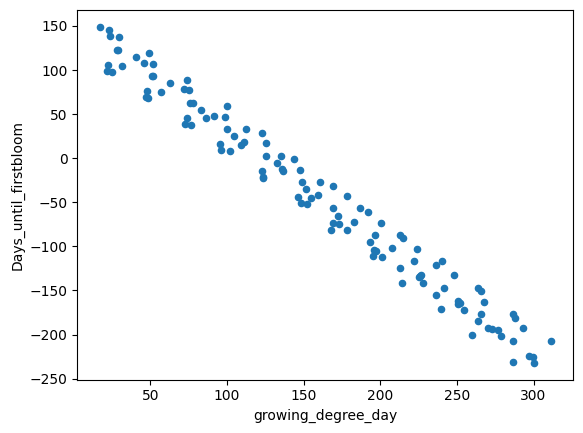

In [37]:
final_df.plot.scatter(x='growing_degree_day', y='Days_until_firstbloom')